# 필요한 라이브러리 불러오기

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import openpyxl

# 그래프 표출 시 한글폰트가 보이기 위한 설정

In [95]:
sns.set(rc={'axes.unicode_minus':False}, font='NanumBarunGothic', style='whitegrid', font_scale = 2)

# 시도별 순이동인구와 주민등록인구 살펴보기

* 순이동인구 = 전입인구 - 전출인구

In [96]:
# 순이동인구
movement_pop = pd.read_csv('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/시도별5세별순이동인구.csv',
                           encoding='cp949')
movement_pop.head()

,시점,행정구역(시군구)별,연령별,계
0,2011. 01,서울특별시,계,-4324
1,2011. 01,서울특별시,0 - 4세,-1025
2,2011. 01,서울특별시,5 - 9세,-402
3,2011. 01,서울특별시,10 - 14세,144
4,2011. 01,서울특별시,15 - 19세,97


In [97]:
movement_pop.columns = ['연월', '시도', '연령대', '순이동인구(명)']
movement_pop['연월'] = movement_pop['연월'].apply(lambda x: x.replace('. ', '-'))

# 서울, 경기, 부산, 제주만 보도록 하겠음
movement_pop = movement_pop[(movement_pop['시도'] == '서울특별시') | (movement_pop['시도'] == '경기도') |\
                           (movement_pop['시도'] == '부산광역시') | (movement_pop['시도'] == '제주특별자치도')]
movement_pop

,연월,시도,연령대,순이동인구(명)
0,2011-01,서울특별시,계,-4324
1,2011-01,서울특별시,0 - 4세,-1025
2,2011-01,서울특별시,5 - 9세,-402
3,2011-01,서울특별시,10 - 14세,144
4,2011-01,서울특별시,15 - 19세,97
...,...,...,...,...
11875,2021-12,제주특별자치도,60 - 64세,17
11876,2021-12,제주특별자치도,65 - 69세,8
11877,2021-12,제주특별자치도,70 - 74세,3
11878,2021-12,제주특별자치도,75 - 79세,-8


In [98]:
# 주민등록인구
register_pop = pd.read_csv('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/시도별5세별주민등록인구.csv',
                           encoding='cp949')
register_pop

,시점,행정구역(동읍면)별,5세별,항목,데이터
0,2011,전국,계,총인구수 (명),50734284
1,2011,전국,계,남자인구수 (명),25406934
2,2011,전국,계,여자인구수 (명),25327350
3,2011,전국,0 - 4세,총인구수 (명),2328435
4,2011,전국,0 - 4세,남자인구수 (명),1198629
...,...,...,...,...,...
12997,2021,제주특별자치도,95 - 99세,남자인구수 (명),82
12998,2021,제주특별자치도,95 - 99세,여자인구수 (명),824
12999,2021,제주특별자치도,100+,총인구수 (명),195
13000,2021,제주특별자치도,100+,남자인구수 (명),10


In [99]:
register_pop.drop('항목', axis=1, inplace=True)
register_pop.columns = ['연도', '시도', '연령대', '주민등록인구(명)']
register_pop = register_pop.pivot_table(index=['연도', '시도', '연령대'], values='주민등록인구(명)', aggfunc='sum')
register_pop.reset_index(inplace=True)

# 서울, 경기, 부산, 제주만 보도록 하겠음
register_pop = register_pop[(register_pop['시도'] == '서울특별시') | (register_pop['시도'] == '경기도') |\
                           (register_pop['시도'] == '부산광역시') | (register_pop['시도'] == '제주특별자치도')]
register_pop

,연도,시도,연령대,주민등록인구(명)
22,2011,경기도,0 - 4세,1250246
23,2011,경기도,10 - 14세,1599492
24,2011,경기도,100+,4230
25,2011,경기도,15 - 19세,1720804
26,2011,경기도,20 - 24세,1496714
...,...,...,...,...
4285,2021,제주특별자치도,80 - 84세,31600
4286,2021,제주특별자치도,85 - 89세,18860
4287,2021,제주특별자치도,90 - 94세,6614
4288,2021,제주특별자치도,95 - 99세,1812


* 연령대별 변화를 보기 위한 라벨링
* 생애 주기별 특성에 따라 연령대 구분 (e나라도움 사이트 참고)
    * 영‧유아(0~5세)
    * 아동(6~12세)
    * 청소년(13~18세)
    * 청년(19~29세)
    * 중년(30~49세)
    * 장년(50~64세)
    * 노년(65세 이상) 

In [100]:
movement_pop['연령대 구분'] = '노년'
movement_pop.loc[movement_pop['연령대'] == '계', '연령대 구분'] = '계'
movement_pop.loc[movement_pop['연령대'] == '0 - 4세', '연령대 구분'] = '영, 유아'
movement_pop.loc[(movement_pop['연령대'] == '5 - 9세') | (movement_pop['연령대'] == '10 - 14세') |\
                 (movement_pop['연령대'] == '15 - 19세'), '연령대 구분'] = '아동, 청소년'
movement_pop.loc[(movement_pop['연령대'] == '20 - 24세') | (movement_pop['연령대'] == '25 - 29세'), '연령대 구분'] = '청년'
movement_pop.loc[(movement_pop['연령대'] == '30 - 34세') | (movement_pop['연령대'] == '35 - 39세') |\
                 (movement_pop['연령대'] == '40 - 44세') | (movement_pop['연령대'] == '45 - 49세'), '연령대 구분'] = '중년'
movement_pop.loc[(movement_pop['연령대'] == '50 - 54세') | (movement_pop['연령대'] == '55 - 59세') |\
                 (movement_pop['연령대'] == '60 - 64세'), '연령대 구분'] = '장년'

movement_pop_age = movement_pop.pivot_table(index=['연월', '시도', '연령대 구분'], values='순이동인구(명)', aggfunc='sum')
movement_pop_age.reset_index(inplace=True)
movement_pop_age

,연월,시도,연령대 구분,순이동인구(명)
0,2011-01,경기도,계,8220
1,2011-01,경기도,노년,643
2,2011-01,경기도,"아동, 청소년",762
3,2011-01,경기도,"영, 유아",720
4,2011-01,경기도,장년,961
...,...,...,...,...
3691,2021-12,제주특별자치도,"아동, 청소년",30
3692,2021-12,제주특별자치도,"영, 유아",17
3693,2021-12,제주특별자치도,장년,8
3694,2021-12,제주특별자치도,중년,197


In [101]:
register_pop['연령대 구분'] = '노년'
register_pop.loc[register_pop['연령대'] == '계', '연령대 구분'] = '계'
register_pop.loc[register_pop['연령대'] == '0 - 4세', '연령대 구분'] = '영, 유아'
register_pop.loc[(register_pop['연령대'] == '5 - 9세') | (register_pop['연령대'] == '10 - 14세') |\
                 (register_pop['연령대'] == '15 - 19세'), '연령대 구분'] = '아동, 청소년'
register_pop.loc[(register_pop['연령대'] == '20 - 24세') | (register_pop['연령대'] == '25 - 29세'), '연령대 구분'] = '청년'
register_pop.loc[(register_pop['연령대'] == '30 - 34세') | (register_pop['연령대'] == '35 - 39세') |\
                 (register_pop['연령대'] == '40 - 44세') | (register_pop['연령대'] == '45 - 49세'), '연령대 구분'] = '중년'
register_pop.loc[(register_pop['연령대'] == '50 - 54세') | (register_pop['연령대'] == '55 - 59세') |\
                 (register_pop['연령대'] == '60 - 64세'), '연령대 구분'] = '장년'

register_pop_age = register_pop.pivot_table(index=['연도', '시도', '연령대 구분'], values='주민등록인구(명)', aggfunc='sum')
register_pop_age.reset_index(inplace=True)
register_pop_age

,연도,시도,연령대 구분,주민등록인구(명)
0,2011,경기도,계,23874830
1,2011,경기도,노년,2144924
2,2011,경기도,"아동, 청소년",4580386
3,2011,경기도,"영, 유아",1250246
4,2011,경기도,장년,4148812
...,...,...,...,...
303,2021,제주특별자치도,"아동, 청소년",210620
304,2021,제주특별자치도,"영, 유아",46092
305,2021,제주특별자치도,장년,329116
306,2021,제주특별자치도,중년,384554


## 시도별 순이동인구와 주민등록인구 변화

Text(0.5, 1.0, '10년간 시도별 순이동인구 변화')

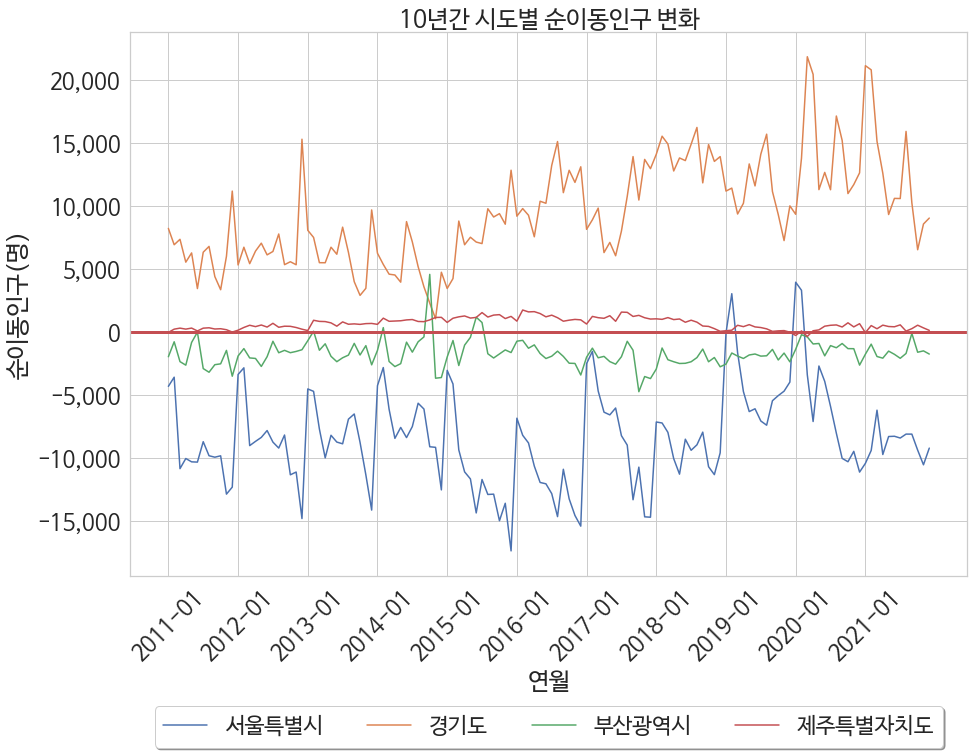

In [102]:
movement_pop_sum = movement_pop_age[movement_pop_age['연령대 구분'] == '계']

plt.figure(figsize=(15,10))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x), ',')))
ax = sns.lineplot(data=movement_pop_sum, x='연월', y='순이동인구(명)', hue='시도', 
                  hue_order = ['서울특별시', '경기도', '부산광역시', '제주특별자치도'])
ax.set_xticks([i for i in range(0, 132, 12)])
ax.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), fancybox=True, shadow=True, ncol=4)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('10년간 시도별 순이동인구 변화')

* 최근 10년 동안 서울과 부산은 전입 인구보다 전출 인구가 더 많은 추세임
* 서울이랑 부산 중에서도 서울의 전출 인구가 압도적으로 많은 것으로 보임
* 부산의 경우 2014년 말에는 전입 인구가 더 많은 시기가 있었지만 그 외에는 모두 전출 인구가 더 많음
* 서울의 경우에는 2019년 초와 2020년 초에 전출 인구보다 전입 인구가 더 많은 시기가 있었지만 그 외에는 역시나 전출 인구가 더 많음
* 전출 인구가 더 많은 서울에 비해 경기도는 전입 인구가 계속해서 증가하고 있음
* 제주의 경우 2019년 말까지 전출 인구보다는 전입 인구가 더 많았으면 2020년 이후에는 전출 인구와 전입 인구가 비슷해 진 것으로 보임

Text(0.5, 0.98, '10년간 주민등록인구 변화')

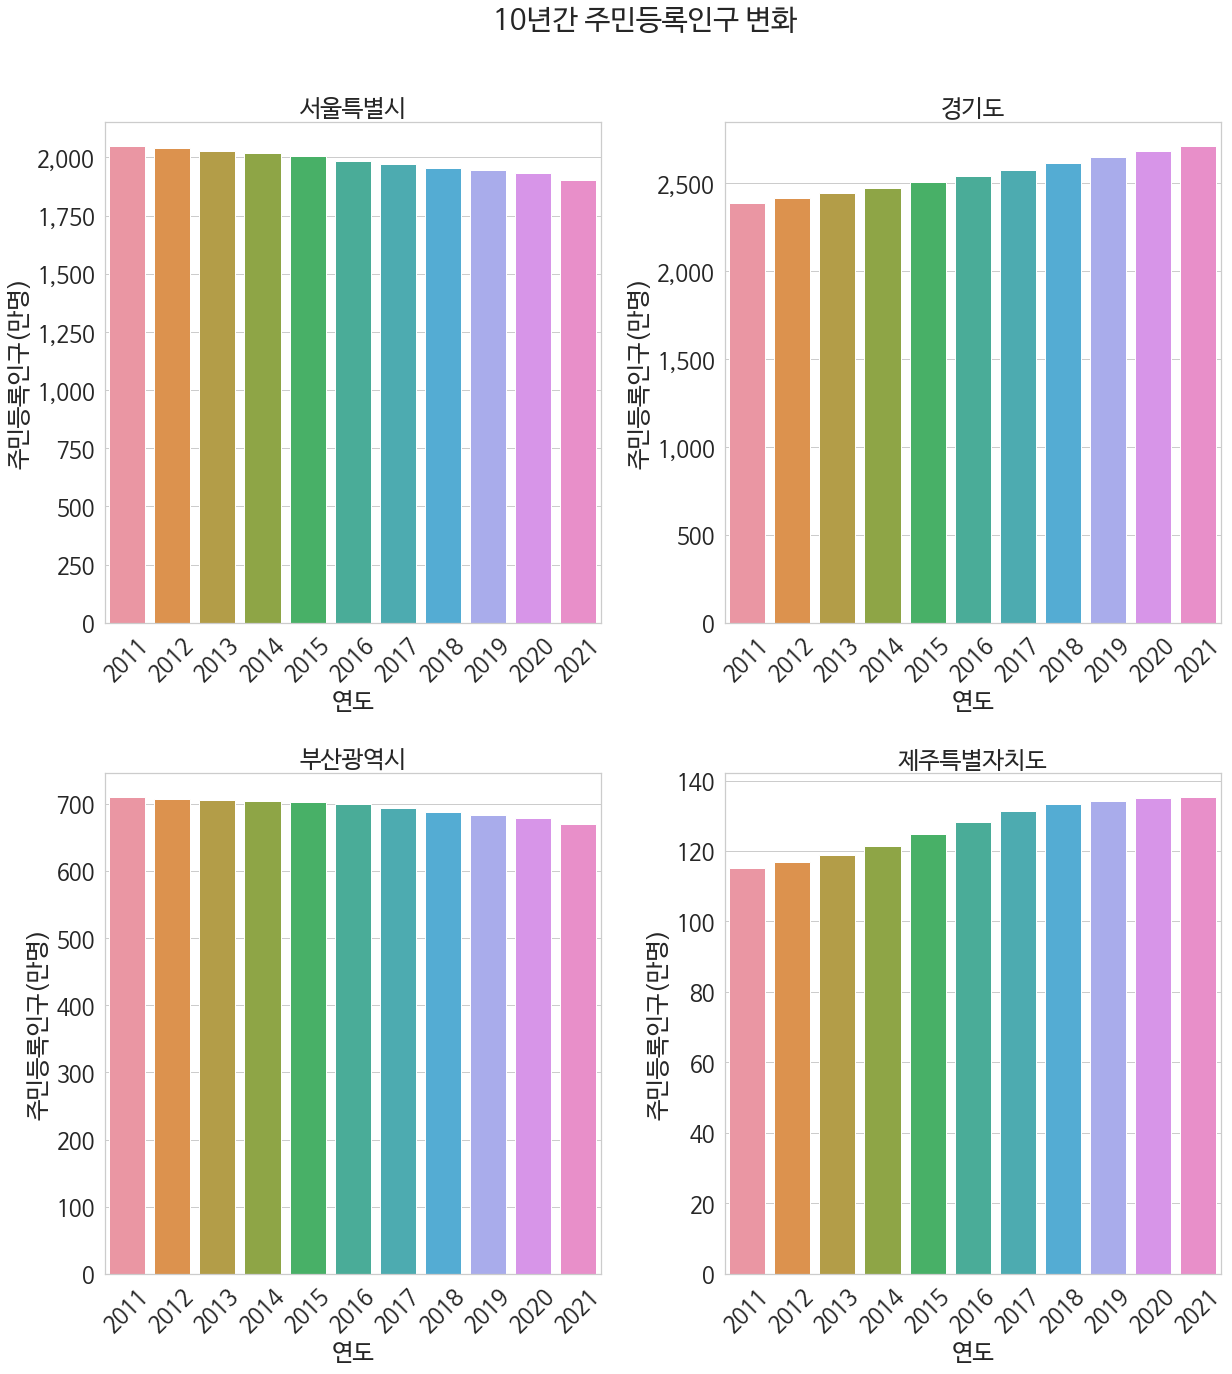

In [103]:
sido_list = ['서울특별시', '경기도', '부산광역시', '제주특별자치도']

plt.figure(figsize=(20,20))

for sido_num, sido in enumerate(sido_list):
    register_pop_chart = register_pop_age[(register_pop_age['연령대 구분'] == '계') & (register_pop_age['시도'] == sido)]

    plt.subplot(2, 2, sido_num+1)
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x/10000), ',')))
    ax = sns.barplot(data=register_pop_chart, x='연도', y='주민등록인구(명)')
    plt.xticks(rotation = 45)
    plt.ylabel('주민등록인구(만명)')
    plt.title(sido)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)
plt.suptitle('10년간 주민등록인구 변화')

* 순이동인구 변화에서 전입 인구보다 전출 인구가 더 많았던 서울과 부산은 10년간 주민등록인구가 감소하는 추세이고, 전입 인구가 훨씬 많은 것으로 보이는 경기는 주민등록인구가 꾸준히 증가하는 추세임
* 제주의 경우 10년간 주민등록인구가 꾸준히 증가하고 있지만 전출 인구와 전입 인구가 비슷한 것으로 보이던 2020년부터는 증가하는 폭이 매우 적어짐

## 연령대별 순이동인구 살펴보기

Text(0.5, 1.0, '연령대별 순이동인구 변화 - 서울특별시')

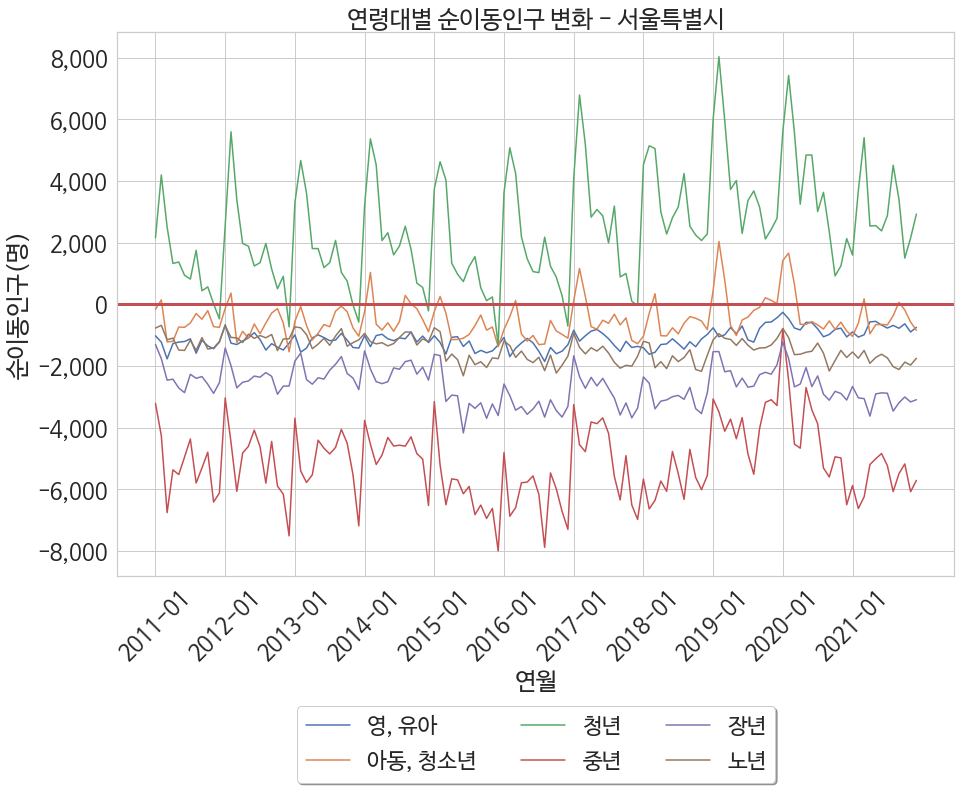

In [112]:
movement_pop_chart = movement_pop_age[movement_pop_age['시도'] == '서울특별시']

plt.figure(figsize=(15,10))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x), ',')))
ax = sns.lineplot(data=movement_pop_chart, x='연월', y='순이동인구(명)', hue='연령대 구분',
                 hue_order = ['영, 유아', '아동, 청소년', '청년', '중년', '장년', '노년'])
ax.set_xticks([i for i in range(0, 132, 12)])
ax.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), fancybox=True, shadow=True, ncol=3)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('연령대별 순이동인구 변화 - 서울특별시')

* 위에서 서울의 전체적인 순이동인구를 살펴보았을 때, 전출 인구가 전입 인구보다 더 많은 것을 확인할 수 있었음
* 연령대별로 살펴보니 청년층(20-29세)은 전입 인구가 더 많으며, 1월달에는 서울로 들어오는 순이동인구가 급증했다가 연말로 갈수록 줄어드는 패턴을 확인할 수 있음
* 아동, 청소년(5-19세)은 2019년 1월과 2020년 1월에 전출 인구보다 전입 인구가 더 많아지는 모습을 보이지만 그 외에는 다른 연령대와 마찬가지로 전출 인구가 더 많음

Text(0.5, 1.0, '연령대별 순이동인구 변화 - 경기도')

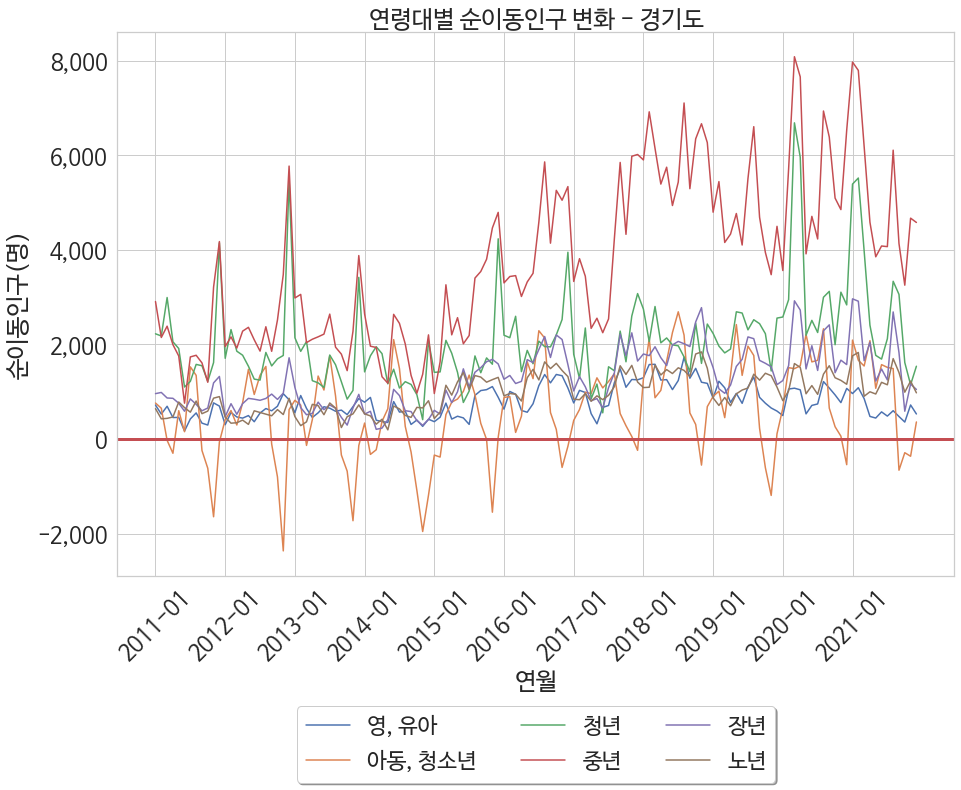

In [113]:
movement_pop_chart = movement_pop_age[movement_pop_age['시도'] == '경기도']

plt.figure(figsize=(15,10))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x), ',')))
ax = sns.lineplot(data=movement_pop_chart, x='연월', y='순이동인구(명)', hue='연령대 구분',
                 hue_order = ['영, 유아', '아동, 청소년', '청년', '중년', '장년', '노년'])
ax.set_xticks([i for i in range(0, 132, 12)])
ax.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), fancybox=True, shadow=True, ncol=3)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('연령대별 순이동인구 변화 - 경기도')

* 위에서 경기의 전체적인 순이동인구를 살펴보았을 때, 전입 인구가 전출 인구보다 더 많은 것을 확인할 수 있었음
* 연령대별로 살펴보니 아동, 청소년층을 제외한 모든 연령대에서 10년간 전입 인구가 많음
* 특히나 경기로 유입되고 있는 인구는 청년층, 중년층이 많은 것으로 보임

Text(0.5, 1.0, '연령대별 순이동인구 변화 - 부산광역시')

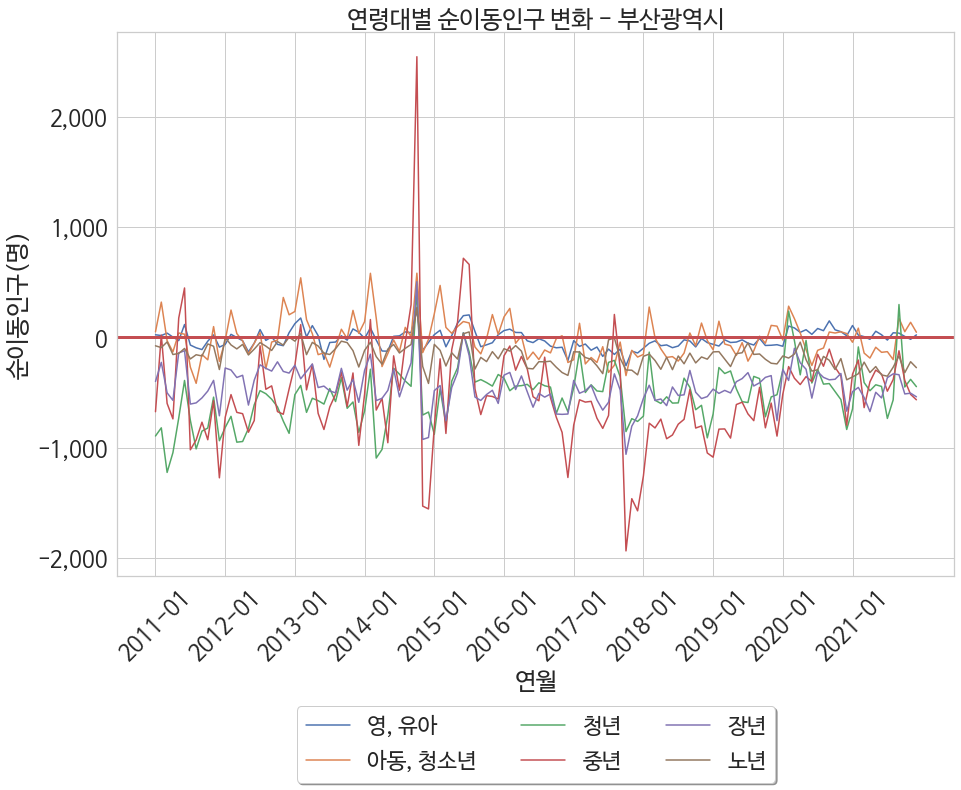

In [114]:
movement_pop_chart = movement_pop_age[movement_pop_age['시도'] == '부산광역시']

plt.figure(figsize=(15,10))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x), ',')))
ax = sns.lineplot(data=movement_pop_chart, x='연월', y='순이동인구(명)', hue='연령대 구분',
                 hue_order = ['영, 유아', '아동, 청소년', '청년', '중년', '장년', '노년'])
ax.set_xticks([i for i in range(0, 132, 12)])
ax.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), fancybox=True, shadow=True, ncol=3)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('연령대별 순이동인구 변화 - 부산광역시')

* 부산의 경우 전체적인 순이동인구 변화를 살펴볼 때 전입 인구보다 전출 인구가 더 많았음
* 2014년 말에 중년층의 유입이 급증한 것 외에는 모든 연령대에서 전출 인구가 더 많은 것을 확인할 수 있음

Text(0.5, 1.0, '연령대별 순이동인구 변화 - 제주특별자치도')

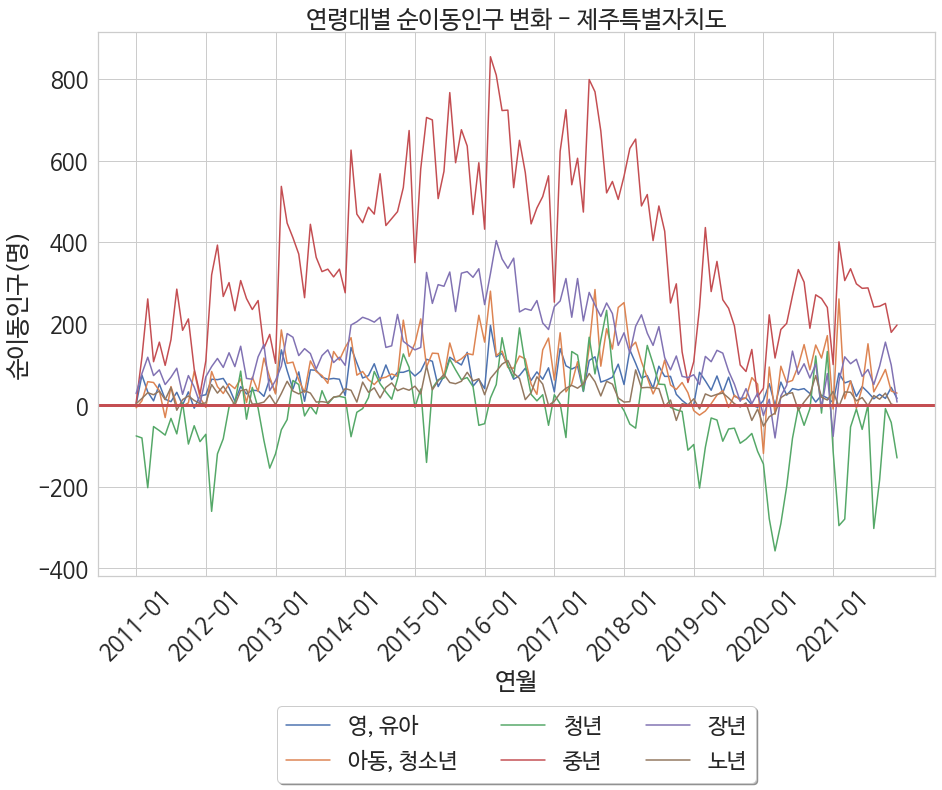

In [115]:
movement_pop_chart = movement_pop_age[movement_pop_age['시도'] == '제주특별자치도']

plt.figure(figsize=(15,10))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x), ',')))
ax = sns.lineplot(data=movement_pop_chart, x='연월', y='순이동인구(명)', hue='연령대 구분',
                 hue_order = ['영, 유아', '아동, 청소년', '청년', '중년', '장년', '노년'])
ax.set_xticks([i for i in range(0, 132, 12)])
ax.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), fancybox=True, shadow=True, ncol=3)
plt.axhline(y=0, color='r', linewidth=3)
plt.title('연령대별 순이동인구 변화 - 제주특별자치도')

* 제주는 전체적인 순이동인구 변화를 살펴보았을 때, 전입 인구가 전출 인구보다 많은데 최근에 그 폭이 좀 줄어든 것을 확인할 수 있었음
* 제주의 경우 중년층의 유입이 많은 것으로 보이며, 2019년 이후로 청년층이 많이 빠져나가고 있는 것으로 보임

## 시도별 고령화 인구 비율 비교하기

In [170]:
year_list = list(register_pop_age['연도'].unique())
sido_list = list(register_pop_age['시도'].unique())

for year_num, year in enumerate(year_list):
    for sido_num, sido in enumerate(sido_list):
        pop_sum = register_pop_age.loc[(register_pop_age['연도'] == year) &\
                                       (register_pop_age['시도'] == sido) &\
                                       (register_pop_age['연령대 구분'] == '계'), '주민등록인구(명)']

        register_pop_age.loc[(register_pop_age['연도'] == year) &\
                             (register_pop_age['시도'] == sido), '인구 비율'] = round(register_pop_age['주민등록인구(명)'] * 100 / int(pop_sum), 2)

register_pop_age

,연도,시도,연령대 구분,주민등록인구(명),인구 비율
0,2011,경기도,계,23874830,100.00
1,2011,경기도,노년,2144924,8.98
2,2011,경기도,"아동, 청소년",4580386,19.18
3,2011,경기도,"영, 유아",1250246,5.24
4,2011,경기도,장년,4148812,17.38
...,...,...,...,...,...
303,2021,제주특별자치도,"아동, 청소년",210620,15.56
304,2021,제주특별자치도,"영, 유아",46092,3.41
305,2021,제주특별자치도,장년,329116,24.32
306,2021,제주특별자치도,중년,384554,28.41


Text(0.5, 1.0, '시도별 고령화 인구 비율 변화')

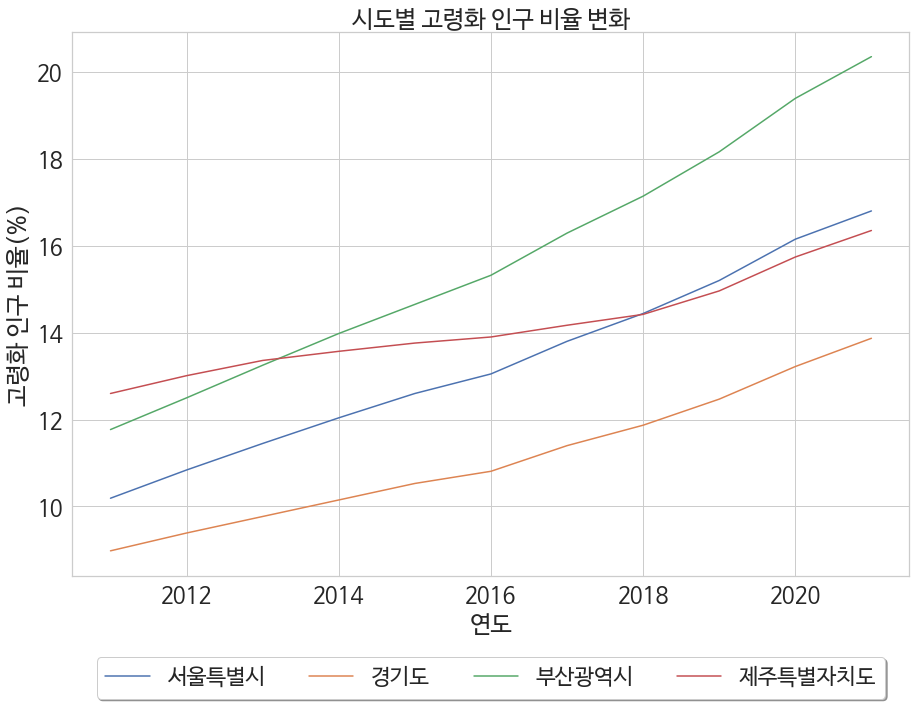

In [179]:
register_pop_chart = register_pop_age[register_pop_age['연령대 구분'] == '노년']

plt.figure(figsize=(15,10))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x), ',')))
ax = sns.lineplot(data=register_pop_chart, x='연도', y='인구 비율', hue='시도',
                 hue_order = ['서울특별시', '경기도', '부산광역시', '제주특별자치도'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), fancybox=True, shadow=True, ncol=5)
plt.ylabel('고령화 인구 비율(%)')
plt.title('시도별 고령화 인구 비율 변화')

* 10년동안 고령화 인구 비율 변화폭을 살펴봤을 때는 부산의 고령화 인구가 급격하게 증가하고 있으며 그 뒤를 서울이 따르고 있는 것으로 보임
* 제주는 고령화 비율이 낮지는 않지만 서울과 부산에 비해서는 증가폭이 낮은 편임
* 경기는 고령화 비율도 가장 낮고, 증가폭도 그리 크지 않은 것으로 보임

# 시도별 주택매매가격지수 살펴보기

In [140]:
housing_sale = pd.read_excel('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/월간_매매가격지수_종합.xlsx')
housing_sale = housing_sale[9:]
housing_sale.set_index('* 통계표명 :', inplace=True)

housing_sale_trans = housing_sale.T
housing_sale_trans.set_index('지 역', inplace=True)

housing_sale_stack = pd.DataFrame(housing_sale_trans.stack())
housing_sale_stack.reset_index(inplace=True)
housing_sale_stack.columns = ['연월', '시도', '매매가격지수']
housing_sale_stack['연월'] = housing_sale_stack['연월'].apply(lambda x: x.replace('년 ', '-'))
housing_sale_stack['연월'] = housing_sale_stack['연월'].apply(lambda x: x.replace('월', ''))
housing_sale_stack = housing_sale_stack[housing_sale_stack['연월'] > '2010-12']
housing_sale_stack.reset_index(inplace=True, drop=True)
housing_sale_stack

,연월,시도,매매가격지수
0,2011-01,전국,79.736537
1,2011-01,서울,83.35919
2,2011-01,경기,79.044845
3,2011-01,인천,85.137084
4,2011-01,부산,74.324255
...,...,...,...
2371,2021-12,전북,103.438183
2372,2021-12,전남,101.798729
2373,2021-12,경북,102.458359
2374,2021-12,경남,103.584098


* 시도별 주택매매가격지수 변화를 살펴보기 전에 전국을 먼저 살펴봄

<ipython-input-156-54bd86f4e50f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_sale_chart['매매가격지수'] = housing_sale_chart['매매가격지수'].astype(float)


Text(0.5, 1.0, '10년간 주택매매가격지수 변화')

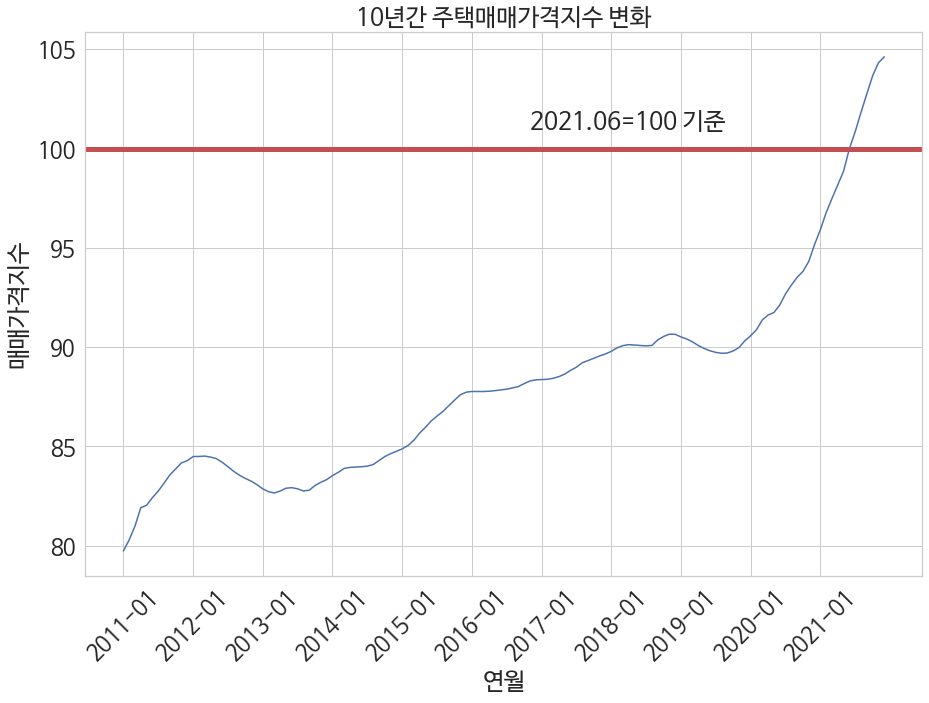

In [156]:
housing_sale_chart = housing_sale_stack[housing_sale_stack['시도'] == '전국']
housing_sale_chart['매매가격지수'] = housing_sale_chart['매매가격지수'].astype(float)

plt.figure(figsize=(15,10))
ax = sns.lineplot(data=housing_sale_chart, x='연월', y='매매가격지수')
ax.set_xticks([i for i in range(0, 132, 12)])
ax.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
plt.axhline(y=100, color='r', linewidth=5)
plt.text(70, 101, '2021.06=100 기준')
plt.title('10년간 주택매매가격지수 변화')

* 전국적으로 주택매매가격지수 변화를 살펴보면 2012년 1월, 2019년 1월처럼 매매가격의 상승이 주춤하는 시기가 있지만, 근 10년 동안 전반적으로 매매가격이 상승했다는 것을 알 수 있음

<ipython-input-159-f1cb0fc76618>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_sale_chart['매매가격지수'] = housing_sale_chart['매매가격지수'].astype(float)


Text(0.5, 1.0, '10년간 주택매매가격지수 변화')

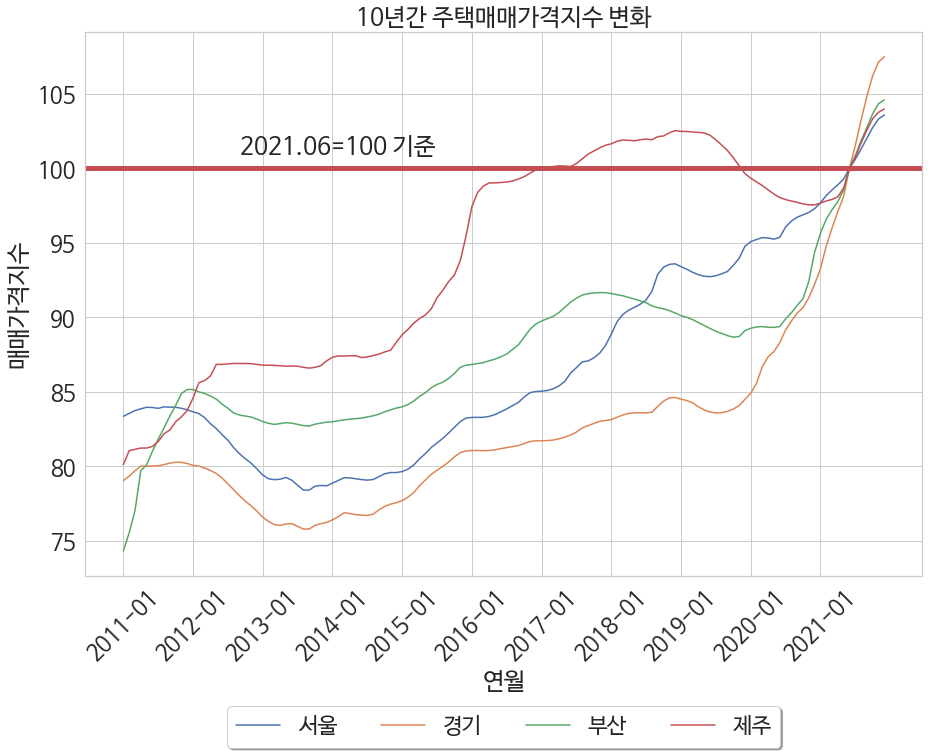

In [159]:
housing_sale_chart = housing_sale_stack[(housing_sale_stack['시도'] == '서울') | (housing_sale_stack['시도'] == '경기') |\
                                       (housing_sale_stack['시도'] == '부산') | (housing_sale_stack['시도'] == '제주')]

housing_sale_chart['매매가격지수'] = housing_sale_chart['매매가격지수'].astype(float)

plt.figure(figsize=(15,10))
ax = sns.lineplot(data=housing_sale_chart, x='연월', y='매매가격지수', hue='시도', hue_order = ['서울', '경기', '부산', '제주'])
ax.set_xticks([i for i in range(0, 132, 12)])
ax.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), fancybox=True, shadow=True, ncol=4)
plt.axhline(y=100, color='r', linewidth=5)
plt.text(20, 101, '2021.06=100 기준')
plt.title('10년간 주택매매가격지수 변화')

* 전국의 주택매매가격지수 변화에서도 살펴볼 수 있듯이 2012년 1월을 기점으로 서울, 경기, 부산의 매매가격이 하락한 것을 확인할 수 있음
* 서울의 경우 2014년 이후 매매가격이 꾸준히 상승하고 있는 것을 확인할 수 있음
* 경기 또한 2014년 이후 매매가격이 꾸준히 상승하고 있는데, 2019년 1월을 기점으로 주춤하는 듯했으나 다시 큰 폭으로 상승하여 최근에는 2021년 6월에 비해 가장 큰 폭으로 상승함
* 부산의 경우 2014년부터 2017년 말까지 매매가격이 상승했으나, 2018년부터 2년 정도 하락하는 모습을 보임 하지만 이내 곧 2020년 이후에 큰 폭으로 상승함
* 제주는 다른 시도와 다리 2015~2016년 사이에 증가한 폭이 매우 큼
* 2019년 이후에 매매가격이 하락했다가 다른 시도에 비해 좀 늦게 2021년부터 다시 상승하는 모습을 보임

# 주택건설인허가실적 대비 미분양주택현황

In [196]:
# 주택건설인허가실적 데이터 불러오기
licensing_house = pd.read_csv('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/주택건설인허가실적.csv')
licensing_house.rename(columns={'Unnamed: 0': '연월'}, inplace=True)

licensing_house_stack = pd.DataFrame(licensing_house.set_index('연월').stack())
licensing_house_stack.reset_index(inplace=True)
licensing_house_stack.columns = ['연월', '시도', '주택인허가실적(호)']
licensing_house_stack['시도'] = licensing_house_stack['시도'].apply(lambda x: x.replace('[호]', ''))
licensing_house_stack

,연월,시도,주택인허가실적(호)
0,2007-01-01,전국,12038.0
1,2007-01-01,부산,455.0
2,2007-01-01,충북,188.0
3,2007-01-01,충남,1004.0
4,2007-01-01,대구,818.0
...,...,...,...
3498,2021-02-01,공공부문,5902.0
3499,2021-02-01,부문별,59830.0
3500,2021-02-01,세종,38.0
3501,2021-02-01,서울,9599.0


In [201]:
# 미분양주택현황 데이터 불러오기
unsold_house = pd.read_csv('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/미분양주택현황.csv')
unsold_house.rename(columns={'Unnamed: 0': '연월'}, inplace=True)

unsold_house_stack = pd.DataFrame(unsold_house.set_index('연월').stack())
unsold_house_stack.reset_index(inplace=True)
unsold_house_stack.columns = ['연월', '시도', '미분양주택(호)']
unsold_house_stack['시도'] = unsold_house_stack['시도'].apply(lambda x: x.replace('[호]', ''))
unsold_house_stack.head(20)

,연월,시도,미분양주택(호)
0,2007-01-01,전국,75616.0
1,2007-01-01,서울,697.0
2,2007-01-01,부산,8680.0
3,2007-01-01,대구,9467.0
4,2007-01-01,인천,243.0
5,2007-01-01,광주,7005.0
6,2007-01-01,대전,819.0
7,2007-01-01,울산,1180.0
8,2007-01-01,경기,3604.0
9,2007-01-01,강원,5312.0


In [218]:
# 주택건설인허가실적 데이터와 미분양주택현황 데이터 조인하기
licensing_unsold = pd.merge(licensing_house_stack, unsold_house_stack, how='left', on=['연월', '시도'])
licensing_unsold = licensing_unsold[(licensing_unsold['시도'] == '서울') | (licensing_unsold['시도'] == '경기') |\
                                    (licensing_unsold['시도'] == '부산') | (licensing_unsold['시도'] == '제주')]
licensing_unsold = licensing_unsold[licensing_unsold['연월'] > '2010-12-01']
licensing_unsold['연도'] = licensing_unsold['연월'].apply(lambda x: x[:4])

licensing_unsold_percent = licensing_unsold.pivot_table(index=['연도', '시도'], values=['주택인허가실적(호)', '미분양주택(호)'], aggfunc='sum')
licensing_unsold_percent['대비'] = round(licensing_unsold_percent['미분양주택(호)'] * 100 / licensing_unsold_percent['주택인허가실적(호)'], 2)
licensing_unsold_percent.reset_index(inplace=True)
licensing_unsold_percent.head()

,연도,시도,미분양주택(호),주택인허가실적(호),대비
0,2011,경기,257149.0,602879.0,42.65
1,2011,부산,35414.0,200625.0,17.65
2,2011,서울,22906.0,496321.0,4.62
3,2011,제주,2208.0,66918.0,3.30
4,2012,경기,272005.0,702378.0,38.73


<AxesSubplot:xlabel='None-시도', ylabel='연도'>

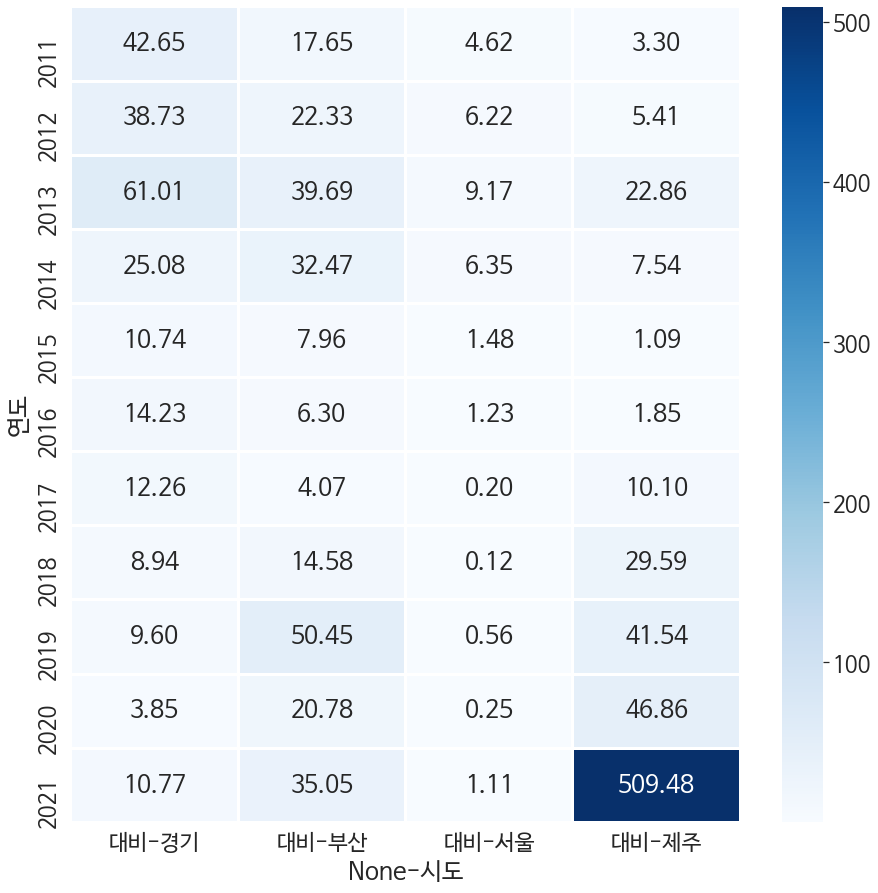

In [224]:
licensing_unsold_chart = licensing_unsold_percent[['연도', '시도', '대비']]
licensing_unsold_chart = licensing_unsold_chart.set_index(['연도', '시도']).unstack()
licensing_unsold_chart

plt.figure(figsize=(15,15))
sns.heatmap(licensing_unsold_chart, cmap="Blues", annot=True, fmt=".2f", linewidths=2)  